In [0]:
from PIL import Image 
import numpy as np 
import math
import matplotlib.pyplot as plt
from pylab import *
import time

In [0]:
def sum_of_squared_distance(A,B):
    sum= np.sum((A-B)**2)
    return sum

In [0]:
def correlation(A,B):
    A= ((A-(np.mean(A)))/(np.std(A)))
    B= ((B-(np.mean(B)))/(np.std(B)))

    corr = np.sum(A*B)
    return corr

In [0]:
def SSD(img1, img2, w_size, disparity, img1_ssd):
    rows=len(img1)-(w_size-1)
    cols=len(img1[0])-(w_size-1)
    p= int(w_size/2)
    
    for i in range(rows):
        for j in range(cols):
            x=img1[i:i+w_size, j:j+w_size]
            c=0
            temp_j=j
            ssd_list= []
            while(c<disparity and temp_j>=0):
                y=img2[i:i+w_size, temp_j:temp_j+w_size]
                ssd= sum_of_squared_distance(x,y)
                ssd_list.append(ssd)
                c+=1
                temp_j-=1
            d_value= ssd_list.index(min(ssd_list))    
            new_d_value= d_value*(255/30)
            img1_ssd[i+p, j+p]= new_d_value

In [0]:
def NCC(img1, img2, w_size, disparity, img1_correlation):
    
    rows=len(img1)-(w_size-1)
    cols=len(img1[0])-(w_size-1)
    p= int(w_size/2)
    
    for i in range(rows):
        for j in range(cols):
            x=img1[i:i+w_size, j:j+w_size]
            c=0
            temp_j=j
            corr_list= []
            while(c<disparity and temp_j>=0):
                y=img2[i:i+w_size, temp_j:temp_j+w_size]
                corr= correlation(x,y)
                corr_list.append(corr)
                c+=1
                temp_j-=1
            d_value= corr_list.index(max(corr_list))    
            new_d_value= d_value*(255/30)
            img1_correlation[i+p, j+p]= new_d_value
    

In [0]:
def run(img1, img2, w_size, disparity): 
    try:      
        img1_ssd= np.zeros([len(img1), len(img1[0])], dtype='int')
        img1_correlation= np.zeros([len(img1), len(img1[0])], dtype='int')
                        
        %time SSD(img1, img2, w_size, disparity, img1_ssd) 

        imshow(img1_ssd, cmap='gray')
        title('from SSD with window size 9')
        show()
        
        %time NCC(img1, img2, w_size, disparity, img1_correlation) 

        imshow(img1_correlation, cmap='gray')
        title('from correlation with window size 9')
        show()
    
    except IOError: 
        pass


In [0]:
img1= Image.open("tsukuba1.ppm").convert('L')
img2= Image.open("tsukuba2.ppm").convert('L')

img1= np.array(img1)
img2= np.array(img2)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
CPU times: user 24.5 s, sys: 5.4 ms, total: 24.5 s
Wall time: 24.6 s


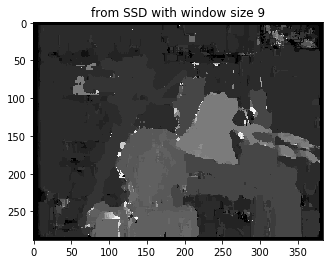

CPU times: user 4min 16s, sys: 31 ms, total: 4min 16s
Wall time: 4min 16s


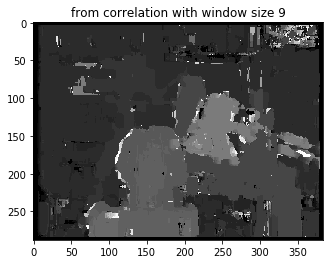

In [8]:
%time 
run(img1, img2, 9, 30)